In [1]:
import pandas as pd
import plotly
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
from string import ascii_letters
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('./right_join.csv', low_memory=False)
badges_conv = pd.read_csv('./badges_converts_relevant.csv', low_memory=False)
badges_q = pd.read_csv('./badges_q_users.csv', low_memory=False)
comments=pd.read_csv('./comments_inner_join.csv', low_memory=False)


In [108]:
df['anzahl_antw'].fillna(0, inplace=True)
df['anzahl_fragen'].fillna(0, inplace=True)
df['avg_score_antw'].fillna(0.0, inplace=True)
df['avg_score_frage'].fillna(0.0, inplace=True)

In [109]:
#badges_conv.groupby('name').size()

In [110]:
df = df[df.columns[1:]] # drop redundant id column



In [111]:
dff=df.dropna()
day_diff=np.array([int(i.days) for i in (pd.to_datetime(dff['min_date_frage'])-pd.to_datetime(dff['min_date_antw']))])
dff['days']=day_diff
#print(timedifference)
dff=dff.sort_values('days', ascending=True)
dff["days_sign"] = np.sign(dff.days)
dff['days'].describe()
print(list(badges_conv))

C:\Users\michi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



['name', 'date', 'user_id', 'class', 'tag_based', 'min_date_antw']


In [112]:
q_users=df.loc[df['anzahl_antw'] == 0]
q_and_badge=q_users.join(badges_q.set_index('user_id'),rsuffix="_badge", on='owner_antw')
q_and_badge.sort_values(by=['date'], ascending=False).head()

,owner_antw,anzahl_fragen,avg_score_frage,min_date_frage,anzahl_antw,avg_score_antw,min_date_antw,name,date,class,tag_based
172173,NaN,4.0,-7.500000e-01,2013-04-10 05:01:18.710000+00:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN
172174,NaN,14.0,1.114286e+01,2015-01-22 15:48:30.703000+00:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN
172175,NaN,10.0,-2.498002e-17,2018-05-14 15:47:38.097000+00:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN
172176,NaN,25.0,-8.000000e-02,2017-12-08 08:23:55.423000+00:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN
172177,NaN,8.0,-3.750000e-01,2018-02-28 03:38:51.510000+00:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [113]:
s=dff['days_sign'].value_counts()
q_users = len(df[df['anzahl_antw'] == 0])
a_users = len(df[df['anzahl_fragen'] == 0 ])
mixed_users = len(df[(df['anzahl_fragen'] > 0) & (df['anzahl_antw'] > 0)])
counts=badges_conv.groupby(['user_id']).size().reset_index(name='num_of_badges')
j=dff.join(counts.set_index('user_id'),rsuffix='_badge', on='owner_antw')
detail=dff.join(badges_conv.set_index('user_id'),rsuffix="_badge", on='owner_antw')
j['num_of_badges'].fillna(0.0, inplace=True)
j=j.loc[j['days_sign'] == -1]
#j.sort_values(by=['num_of_badges'],ascending=False)
#badge_num_conv=j.groupby(['num_of_badges']).size()
#print(badge_num_conv)
detail=detail.loc[detail['days_sign'] == -1]
detail=detail.loc[detail['name'] == "Good Answer"]
detail.head()
#explanation necessary ;)
#insert appropreate visualisation here. ty

,owner_antw,anzahl_fragen,avg_score_frage,min_date_frage,anzahl_antw,avg_score_antw,min_date_antw,days,days_sign,name,date,class,tag_based,min_date_antw_badge
2830538,286259.0,2.0,2.000000,2010-03-04 13:35:49.027000+00:00,9.0,0.333333,2014-10-22 10:54:43.673000+00:00,-1693,-1,Good Answer,2012-07-19 01:23:02.960000+00:00,2.0,False,2014-10-22 10:54:43.673000+00:00
707410,754377.0,4.0,38.000000,2011-05-17 10:51:45.617000+00:00,3.0,4.000000,2015-09-03 05:49:03.310000+00:00,-1570,-1,Good Answer,2013-10-25 14:55:20.847000+00:00,2.0,False,2015-09-03 05:49:03.310000+00:00
561727,470540.0,10.0,4.500000,2010-10-08 18:45:56.040000+00:00,1.0,1.000000,2014-11-07 20:21:37.800000+00:00,-1492,-1,Good Answer,2013-05-26 11:23:21.573000+00:00,2.0,False,2014-11-07 20:21:37.800000+00:00
2494852,10283.0,1.0,0.000000,2009-02-10 17:31:12.230000+00:00,1.0,2.000000,2012-11-14 16:13:40.853000+00:00,-1373,-1,Good Answer,2009-12-17 13:42:33.343000+00:00,2.0,False,2012-11-14 16:13:40.853000+00:00
88385,12382.0,9.0,56.222222,2008-09-16 14:16:43.923000+00:00,19.0,3.105263,2012-03-15 19:28:53.890000+00:00,-1277,-1,Good Answer,2010-08-27 01:44:19.237000+00:00,2.0,False,2012-03-15 19:28:53.890000+00:00


In [114]:
complete=j.join(comments.set_index('owner_antw'),rsuffix="_comments", on='owner_antw')
complete['anzahl_comments'].fillna(0.0, inplace=True)
complete['avg_rating'].fillna(0.0, inplace=True)
complete['best_rating'].fillna(0.0, inplace=True)
complete.head()

,owner_antw,anzahl_fragen,avg_score_frage,min_date_frage,anzahl_antw,avg_score_antw,min_date_antw,days,days_sign,num_of_badges,anzahl_comments,avg_rating,best_rating
620646,24644.0,9.0,8.555556,2008-10-02 20:54:34.190000+00:00,1.0,0.0,2018-08-31 14:13:13.663000+00:00,-3620,-1,18.0,0.0,0.0,0.0
3635786,9364.0,2.0,1.000000,2008-09-15 18:45:23.867000+00:00,1.0,1.0,2018-03-08 22:14:34.493000+00:00,-3462,-1,3.0,0.0,0.0,0.0
579605,69374.0,4.0,1.750000,2009-05-14 16:50:49.967000+00:00,1.0,0.0,2018-08-20 14:04:28.230000+00:00,-3385,-1,3.0,0.0,0.0,0.0
612948,19031.0,6.0,4.666667,2008-09-22 19:18:21.440000+00:00,1.0,1.0,2017-12-20 21:46:02.677000+00:00,-3377,-1,5.0,0.0,0.0,0.0
2940332,1936.0,3.0,3.000000,2008-08-19 15:51:34.057000+00:00,1.0,-1.0,2017-10-30 19:26:59.530000+00:00,-3360,-1,4.0,2.0,0.0,0.0


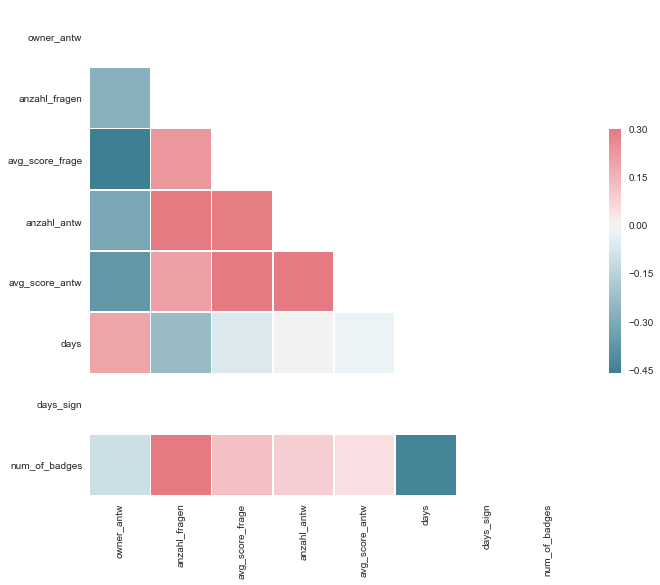

In [115]:
sns.set(style="white")

corr = j.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})